In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Densité spectrale du bruit d'une machine à laver

In [5]:
from scipy.io.wavfile import read
samplerate, amplitude = read('data/machine_a_laver.wav')

In [6]:
N = len(amplitude)
Delta_t = 1/samplerate
T = N*Delta_t

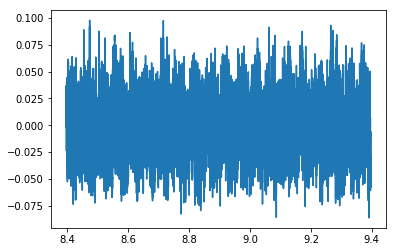

In [7]:
t = np.arange(N)*Delta_t

cond = t>(T-1)
plt.plot(t[cond], amplitude[cond])

In [8]:
from scipy.signal import periodogram
freq, psd = periodogram(amplitude, samplerate)

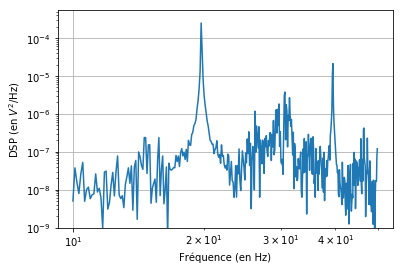

In [9]:
cond = (freq>10) & (freq<50)
plt.loglog(freq[cond], psd[cond])
plt.xlabel('Fréquence (en Hz)')
plt.ylabel('DSP (en $V^2$/Hz)')
plt.ylim(1E-9, None)
plt.grid(True)

In [10]:
puissance_moyenne = np.mean(amplitude**2)
print(puissance_moyenne)

0.0006080771214276875


In [11]:
Delta_f = freq[1]
puissance_moyenne = np.sum(psd)*Delta_f
print(puissance_moyenne)

0.0006080771214276876


Text(0.5,0,'Fréquence (en Hz)')

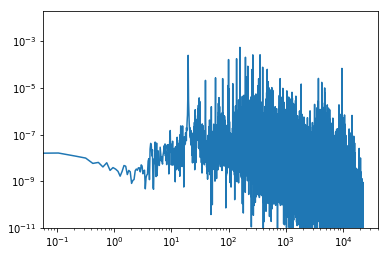

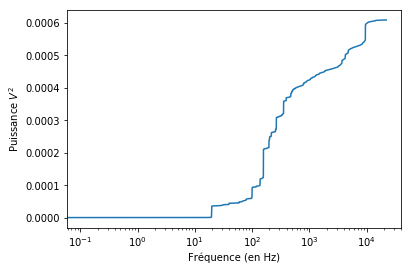

In [12]:
plt.loglog(freq, psd)
plt.ylim(1E-11, None)
plt.figure()
plt.semilogx(freq, Delta_f*np.cumsum(psd))
plt.ylabel('Puissance $V^2$')
plt.xlabel('Fréquence (en Hz)')

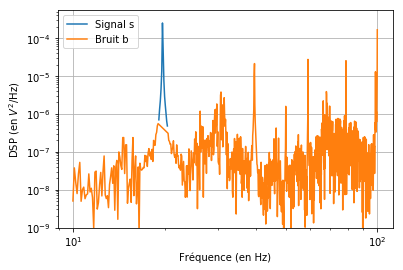

In [13]:
cond = (freq>10) & (freq<100)
#plt.loglog(freq[cond], psd[cond])
pic = (freq>19.1) & (freq<20.5)
plt.loglog(freq[pic], psd[pic], label='Signal s')
plt.loglog(freq[cond & ~pic], psd[cond& ~pic], label='Bruit b')
plt.legend()
plt.xlabel('Fréquence (en Hz)')
plt.ylabel('DSP (en $V^2$/Hz)')
plt.ylim(1E-9, None)
plt.grid(True)

In [14]:
puissance_moyenne_signal = np.sum(psd[pic]*Delta_f)
print("puissance_moyenne_signal :", puissance_moyenne_signal)
print("valeur rms signal :", np.sqrt(puissance_moyenne_signal))

puissance_moyenne_signal : 3.5312966675615684e-05
valeur rms signal : 0.005942471428254046


In [15]:
rapport_signal_a_bruit = puissance_moyenne_signal/(puissance_moyenne - puissance_moyenne_signal)
print(rapport_signal_a_bruit)

0.06165359054443855


In [16]:
# Si on filtre entre 10 et 50 Hz:
cond = (freq>10) & (freq<50)
puissance_filtree = np.sum(psd[cond]*Delta_f)
rapport_signal_a_bruit = puissance_moyenne_signal/(puissance_filtree - puissance_moyenne_signal)
print(rapport_signal_a_bruit)

3.873259523001625


## Filtre en Python

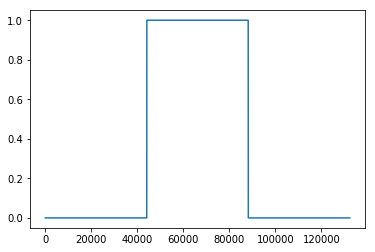

In [17]:
samplerate = 44100
signal = np.zeros(samplerate*3)
signal[samplerate:(samplerate*2)] = 1
plt.plot(signal)

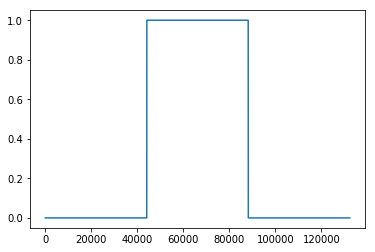

In [18]:
import numpy as np
signal_tilde = np.fft.rfft(signal)
signal_2 = np.fft.irfft(signal_tilde)
plt.plot(signal_2)

In [19]:
np.fft.rfftfreq(len(signal), 1/samplerate)

array([0.00000000e+00, 3.33333333e-01, 6.66666667e-01, ...,
       2.20493333e+04, 2.20496667e+04, 2.20500000e+04])

In [20]:
def pass_bas(signal, f_c, samplerate=44100):
    signal_tilde = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(len(signal), 1/samplerate)
    H = 1/(1+1J*(freqs/f_c))
    signal_2 = np.fft.irfft(H*signal_tilde)
    return signal_2

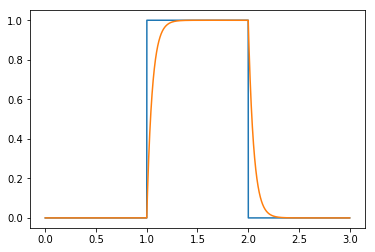

In [21]:
t_signal = np.arange(len(signal))/samplerate
plt.plot(t_signal, signal)
signal_pass_bas = pass_bas(signal, f_c=3)
plt.plot(t_signal, signal_pass_bas)

In [22]:
def pass_haut(signal, f_c, samplerate=44100):
    signal_tilde = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(len(signal), 1/samplerate)
    H = 1J*(freqs/f_c)/(1+1J*(freqs/f_c))
    signal_2 = np.fft.irfft(H*signal_tilde)
    return signal_2

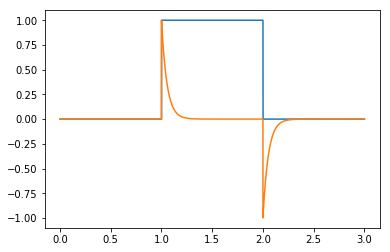

In [23]:
t_signal = np.arange(len(signal))/samplerate
plt.plot(t_signal, signal)
signal_pass_haut = pass_haut(signal, f_c=3)
plt.plot(t_signal, signal_pass_haut)

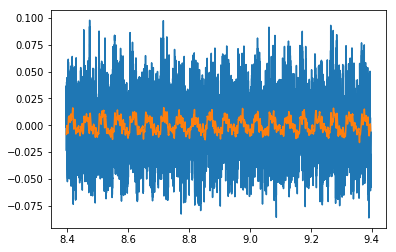

In [24]:
amplitude_filtree = pass_bas(amplitude, f_c=30)
t = np.arange(N)*Delta_t

cond = t>(T-1)
plt.plot(t[cond], amplitude[cond])
plt.plot(t[cond], amplitude_filtree[cond])

In [25]:
amplitude_filtree.std()

0.006389774700565768

## Onde gravitationnelle

In [26]:
from readligo import loaddata
filename_H1 = 'data/H-H1_LOSC_4_V1-1126259446-32.hdf5'
strain_H1, time_H1, chan_dict_H1 = loaddata(filename_H1, 'H1')

filename_L1 = "data/L-L1_LOSC_4_V1-1126259446-32.hdf5"
strain_L1, time_L1, chan_dict_L1 = loaddata(filename_L1, 'L1')


In [27]:
Delta_t = time_H1[1] - time_H1[0]
samplerate = 1/Delta_t
print("Taux echantillonage", samplerate)
N = len(time_H1)
print('N :', N)
print('T : ',N*Delta_t)

Taux echantillonage 4096.0
N : 131072
T :  32.0


Instant detection : 1126259462.0


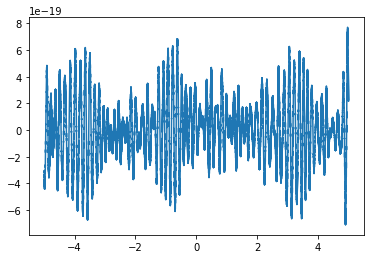

In [28]:
t_detection =  time_H1[N//2]
print('Instant detection :', t_detection)

cond = abs(time_H1-t_detection)<5
plt.plot(time_H1[cond]-t_detection, strain_H1[cond])

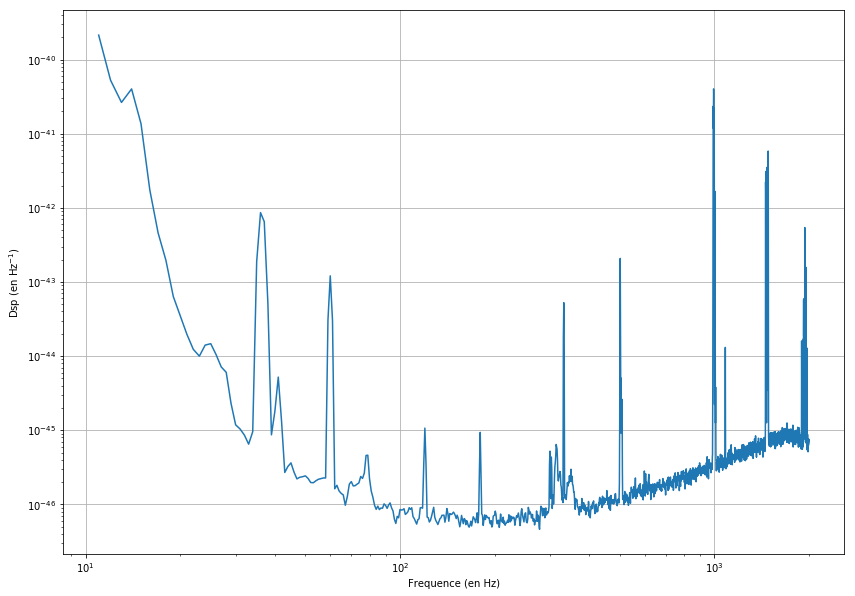

In [29]:
from scipy.signal import welch
freq_w, psd_w = welch(strain_H1, samplerate, nperseg=samplerate)
cond = (freq_w>10) & (freq_w<2000)
plt.figure(figsize=(14, 10))
plt.loglog(freq_w[cond], psd_w[cond])
plt.xlabel('Frequence (en Hz)')
plt.ylabel('Dsp (en Hz$^{-1}$)')
plt.grid(True)

In [33]:
from scipy.interpolate import interp1d    

def whiten(strain, dt):
    freqs_welch, psd_welch = welch(strain, fs=1/dt, nperseg=int(1/dt))
    interp_psd = interp1d(freqs_welch, psd_welch)

    strain_tilde = np.fft.rfft(strain)
    N = len(strain)
    freqs = np.fft.rfftfreq(N, dt)

    gain = 1 / np.sqrt(interp_psd(freqs))
    gain = gain/gain.max()
    white_strain_tilde = strain_tilde * gain
    white_strain = np.fft.irfft(white_strain_tilde)
    return white_strain

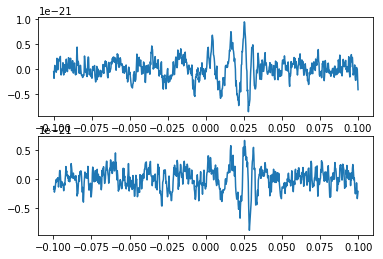

In [47]:
strain_H1_whiten = whiten(strain_H1, dt=1/samplerate)
tmp = pass_bas(strain_H1_whiten, 300, samplerate=samplerate)
strain_H1_whiten_filtre = pass_haut(tmp, 20, samplerate=samplerate)

strain_L1_whiten = whiten(strain_L1, dt=1/samplerate)
tmp = pass_bas(strain_L1_whiten, 300, samplerate=samplerate)
strain_L1_whiten_filtre = pass_haut(tmp, 20, samplerate=samplerate)


t_detectionH1 =  time_H1[N//2]+0.4
condH1 = abs(time_H1-t_detectionH1)<.1
t_detectionL1 =  t_detectionH1 - 0.008
condL1 = abs(time_H1-t_detectionL1)<.1

plt.subplot(2, 1, 1)
plt.plot(time_H1[condH1]-t_detectionH1, strain_H1_whiten_filtre[condH1])
plt.subplot(2, 1, 2)
plt.plot(time_L1[condL1]-t_detectionL1, -strain_L1_whiten_filtre[condL1])


In [58]:
def correlation(signal1, signal2, delta_N=0, fc=10, samplerate=samplerate):
    if delta_N==0:
        correlation = signal1 * signal2
    else:
        if delta_N<0:
            delta_N = -delta_N
            signal1, signal2 = signal2, signal1
        correlation = signal1[delta_N:] * signal2[:-delta_N]
    correlation_filtree = pass_bas(correlation, fc, samplerate)
    return correlation_filtree

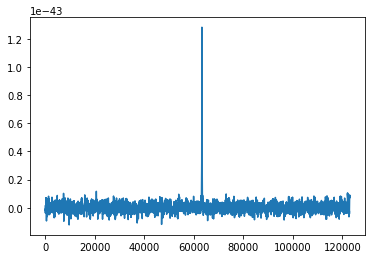

In [76]:
correlation_H1_L1 = correlation(strain_H1_whiten_filtre, -strain_L1_whiten_filtre, 32)
plt.plot(correlation_H1_L1[4000:-4000])

In [73]:
liste_delta_N = np.arange(-70, 70)

samplerate = int(samplerate)
out = []
for delta_N in liste_delta_N:
    tmp = correlation(strain_H1_whiten_filtre, -strain_L1_whiten_filtre, delta_N)
    n_center = len(tmp)//2
    out.append(tmp[(n_center-5*samplerate):(n_center+5*samplerate)])
out = np.array(out)

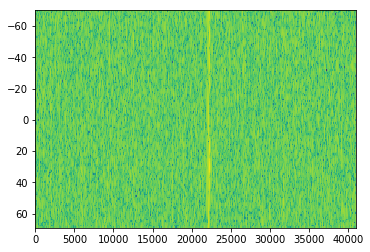

In [83]:
plt.imshow(np.log(abs(out)), aspect=200, extent=(0, out.shape[1], liste_delta_N[-1], liste_delta_N[0]))

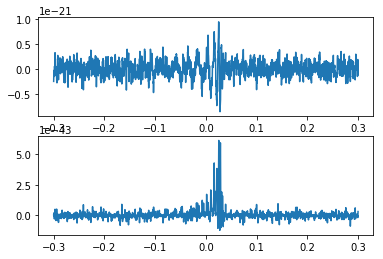

In [91]:
t_detectionH1 =  time_H1[N//2]+0.4
condH1 = abs(time_H1-t_detectionH1)<.3
t_detectionL1 =  t_detectionH1 - 0.008
condL1 = abs(time_H1-t_detectionL1)<.3

plt.subplot(2, 1, 1)
plt.plot(time_H1[condH1]-t_detectionH1, strain_H1_whiten_filtre[condH1])
plt.subplot(2, 1, 2)
plt.plot(time_H1[condH1]-t_detectionH1, strain_H1_whiten_filtre[condH1]*-strain_L1_whiten_filtre[condL1])
